In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Данные по поездкам на такси (Перу).

Небольшое предварительное описание колонок:

journey_id – уникальный id поездки

user_id – id пользователя

driver_id – id водителя

taxi_id – id машины

icon – тип поездки

start_type – тип заказа (asap, reserved, delayed)

start_at – время начала поездки

start_lat – исходное местоположение пользователя, широта

start_lon – исходное местоположение пользователя, долгота

end_at – время окончания поездки

end_lat – итоговое местоположение, широта

end_lon – итоговое местоположение, долгота

end_state – состояние заказа

driver_start_lat – исходное местоположение водителя, широта

driver_start_lon – исходное местоположение водителя, долгота

arrived_at – время прибытия водителя

source – платформа, с которой сделан заказ

driver_score – оценка водителя клиентом

rider_score – оценка клиента водителем



In [138]:
#функция, которая дает предварительную информацию об исходных данных (описательную статистику)
def initial_information_about_the_data(path, separator, columns_for_parse):
    result_dict = dict()
    df = pd.read_csv(path, sep = separator, parse_dates = columns_for_parse)
    df_shape = df.shape
    df_columns = list(df.columns)
    df_columns_types = df.dtypes
    df_description_of_numeric_columns = df.describe()
    df_unique_values = df.nunique()
    df_count_missing_values = df.isna().sum()
    
    result_dict['df'] = df
    result_dict['shape'] = df_shape
    result_dict['names_columns'] = df_columns
    result_dict['types_columns'] = df_columns_types
    result_dict['info_num_columns'] = df_description_of_numeric_columns
    result_dict['unique_values'] = df_unique_values
    result_dict['NaN_count_values'] = df_count_missing_values
    
    return result_dict

In [7]:
info_data = initial_information_about_the_data(path='taxi_peru.csv', separator=';', columns_for_parse = ['start_at', 'end_at', 'arrived_at'])

In [11]:
#наши данные
df = info_data['df']
df

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [13]:
#размер датафрейма
df_shape = info_data['shape']
print(f'Кол-во строк: {df_shape[0]}\nКол-во столбцов: {df_shape[1]}')

Кол-во строк: 23111
Кол-во столбцов: 19


In [15]:
#названия колонок
df_columns = info_data['names_columns']
print(f'Названия колонок: {df_columns}')

Названия колонок: ['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type', 'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon', 'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at', 'source', 'driver_score', 'rider_score']


In [18]:
#типы данных колонок
df_types = info_data['types_columns']
print(f'Типы данных отдельных колонок:\n{df_types}')

Типы данных отдельных колонок:
journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object


In [20]:
#описание числовых колонок 
df_describe_num_columns = info_data['info_num_columns']
df_describe_num_columns

,driver_score,rider_score
count,7650.000000,15390.000000
mean,3.933333,4.755491
std,1.744948,0.840558
min,0.000000,0.000000
25%,4.000000,5.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [21]:
#кол-во уникальных значений в данных 
df_unique_values = info_data['unique_values']
df_unique_values

journey_id          23111
user_id              1390
driver_id             168
taxi_id               213
icon                    3
start_type              3
start_at            20987
start_lat           11753
start_lon            8489
end_at              21780
end_lat             12266
end_lon              9084
end_state               6
driver_start_lat    18425
driver_start_lon    18314
arrived_at          17156
source                  5
driver_score            6
rider_score             6
dtype: int64

In [22]:
df_nan_values = info_data['NaN_count_values']
df_nan_values

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

In [35]:
#'drop off' - высадка
df.end_state.unique()

array(['drop off', 'not found', 'rider cancel', 'driver cancel',
       'failure', nan, 'no show'], dtype=object)

In [36]:
df.driver_score.unique()

array([ 5., nan,  4.,  0.,  2.,  1.,  3.])

В процессе анализа данных, было замечено, что такие колонки как:

start_lat – исходное местоположение пользователя, широта

start_lon – исходное местоположение пользователя, долгота

end_lat – итоговое местоположение, широта

end_lon – итоговое местоположение, долгота

driver_start_lat – исходное местоположение водителя, широта

driver_start_lon – исходное местоположение водителя, долгота

имеют тип object (кол - во уникальных значений ~ 20000), но на самом деле широта и долгота - это числовые характеристики. Было принято заменить ',' в значениях этих колонок и перевести тип object в тип float, чтобы в дальнейшем было удобнее просматривать закономерности в данных.

In [44]:
df[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'driver_start_lat', 'driver_start_lon']] = df[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'driver_start_lat', 'driver_start_lon']] \
.apply(lambda x: x.str.replace(',', '.')) \
.astype('float64')

In [45]:
df

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,-12.139835,-77.023560,2010-11-16 17:29:00,-12.055370,-77.041321,drop off,-12.108255,-77.027274,2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,-12.138748,-76.995361,2010-06-01 00:37:00,-12.124657,-77.028870,not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,-12.124531,-77.027802,2010-05-31 05:04:00,-12.138832,-76.995300,not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,-12.138851,-76.995300,2010-06-01 00:32:00,-12.124588,-77.028961,not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,-12.089954,-76.926270,2010-09-12 01:07:00,-12.022232,-77.106384,drop off,-12.083116,-76.927707,2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,-12.089741,-77.046997,2010-07-31 13:27:00,-12.083527,-77.050446,drop off,-12.089735,-77.047870,2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,-12.092530,-77.028753,2010-10-02 05:56:00,-12.077760,-77.056238,drop off,-12.106397,-77.040289,2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,-12.127564,-77.026423,2010-09-21 10:18:00,-12.105298,-77.047352,drop off,-12.126050,-77.018825,2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,-12.019468,-77.107767,2010-04-29 05:11:00,-12.099100,-77.034750,drop off,-12.071093,-77.098551,2010-04-29 04:23:00,Android,NaN,5.0


In [47]:
#Теперь эти колонки имеют необходимый тип
df.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                  float64
start_lon                  float64
end_at              datetime64[ns]
end_lat                    float64
end_lon                    float64
end_state                   object
driver_start_lat           float64
driver_start_lon           float64
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [51]:
#можно также посмотреть описание категориальных колонок( в данный момент у них тип object)
d_category = df.columns.to_series().groupby(df.dtypes).groups
d_category

{datetime64[ns]: ['start_at', 'end_at', 'arrived_at'], float64: ['start_lat', 'start_lon', 'end_lat', 'end_lon', 'driver_start_lat', 'driver_start_lon', 'driver_score', 'rider_score'], object: ['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type', 'end_state', 'source']}

In [55]:
columns_obj = ['icon', 'start_type', 'end_state', 'source']
for column in columns_obj:
    print(f"Уникальные значения, которые принимает колонка {column}: {list(df[column].unique())}\n")

Уникальные значения, которые принимает колонка icon: ['executive', 'group', 'easy']

Уникальные значения, которые принимает колонка start_type: ['asap', 'reserved', 'delayed']

Уникальные значения, которые принимает колонка end_state: ['drop off', 'not found', 'rider cancel', 'driver cancel', 'failure', nan, 'no show']

Уникальные значения, которые принимает колонка source: ['iPhone', 'Android', 'web', 'iPad', nan, 'Wap']



Пояснение: 

- icon (тип поездки): 'executive' - комфорт , 'group' - групповая, 'easy'- простая

- start_type (тип заказа): 'asap' - немедленно, 'reserved' - зарезервировано заранее, 'delayed' - задержано( с отсрочкой)

- end_state (состояние заказа): 'drop off' - доставка(поездка совершена успешно), 'not found' - не найдено, 'rider cancel'  отказ пассажира, 'driver cancel' - отказ водителя, 'failure' - сбой, nan - неопределено, 'no show' - не явился 

- source (платформа, с которой сделан заказ): 'iPhone', 'Android', 'web', 'iPad', nan, 'Wap'



In [49]:
type(df.dtypes)

pandas.core.series.Series

In [57]:
df[columns_obj] = df[columns_obj].astype('category')
df.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                      category
start_type                category
start_at            datetime64[ns]
start_lat                  float64
start_lon                  float64
end_at              datetime64[ns]
end_lat                    float64
end_lon                    float64
end_state                 category
driver_start_lat           float64
driver_start_lon           float64
arrived_at          datetime64[ns]
source                    category
driver_score               float64
rider_score                float64
dtype: object

In [59]:
#Можно посмотреть на описание категориальных колонок
df[columns_obj].describe(include = 'category')

,icon,start_type,end_state,source
count,23111,23111,23099,22988
unique,3,3,6,5
top,executive,asap,drop off,iPhone
freq,22737,14865,17417,9741


Небольшие наблюдения:

Значения, которые преобладают в соответствующих колонках:

- Самый популярный тип поездки: комфорт
- Преобладающий тип заказа в данных: немедленно
- Преобладающее состояние заказа на основе полученных данных: доставка (успешная поездка)
- Чаще всего заказ делали через iPhone

In [60]:
df.describe(include = 'object')

,journey_id,user_id,driver_id,taxi_id
count,23111,23111,19726,19726
unique,23111,1390,168,213
top,23a1406fc6a11d866e3c82f22eed4d4c,a86c8d399be95a32f795a8a9887127b9,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8
freq,1,834,1523,840


Небольшие наблюдения:

Можно заметить, что все поездки имеют уникальный id. А вот количество уникальных пользователей составляет 1390. Из представленных данных можно сделать вывод, что количество водителей составляет около 168, а количество автомобилей в автопарке такси составляет 213.

Перейдем непосредственно к конкретным задачам:

- Проверим, с какой платформы было сделано больше всего заказов ( в процентах ).

In [79]:
source_and_number = df \
.query('end_state == "drop off"') \
.groupby('source', as_index=False) \
.agg({'end_state': 'count'}) \
.rename(columns={'end_state':'count_drop_off_orders'}) \
.sort_values('count_drop_off_orders', ascending=False) 
source_and_number

,source,count_drop_off_orders
3,iPhone,7383
4,web,6053
0,Android,3358
2,iPad,431
1,Wap,95


In [139]:
#всего успешных заказов
all_orders = source_and_number.count_drop_off_orders.sum()
all_orders

17320

In [85]:
source_and_number['count_drop_off_orders_procents'] = ((source_and_number['count_drop_off_orders']/all_orders)*100).round(2)

In [86]:
source_and_number

,source,count_drop_off_orders,count_drop_off_orders_procents
3,iPhone,7383,42.63
4,web,6053,34.95
0,Android,3358,19.39
2,iPad,431,2.49
1,Wap,95,0.55


Следовательно, больше всего успешных заказов сделано с iPhone (42.63% заказов). Далее идет web платформа ( 34.95%) и Android (19.39 %).

- Проверим, как распределены оценки водителей driver_score.

In [91]:
# Повторно посмотрим шкалу оценок (  какие  значения присутствуют в колонке оценок водителей)
df.driver_score.unique()

array([ 5., nan,  4.,  0.,  2.,  1.,  3.])

In [122]:
driver_score_count = df \
.groupby('driver_score', as_index=False) \
.agg({'driver_score':'count'})

In [123]:
driver_score_count['percentage'] = ((driver_score_count['driver_score']/(driver_score_count['driver_score'].sum()))*100).round(2)

In [124]:
driver_score_count

,driver_score,percentage
0,1094,14.30
1,94,1.23
2,62,0.81
3,227,2.97
4,1674,21.88
5,4499,58.81


In [125]:
driver_score_count = driver_score_count \
.reset_index() \
.rename(columns={'driver_score':'count_scores', 'index':'driver_score'}) \
.sort_values('driver_score')
driver_score_count

,driver_score,count_scores,percentage
0,0,1094,14.30
1,1,94,1.23
2,2,62,0.81
3,3,227,2.97
4,4,1674,21.88
5,5,4499,58.81


Таким образом мы получили  распределение оценок водителей в порядке возрастания (от 0 до 5). Около 58.81% оценок водителей являются наивысшим баллом (5). Построим график для наглядности:


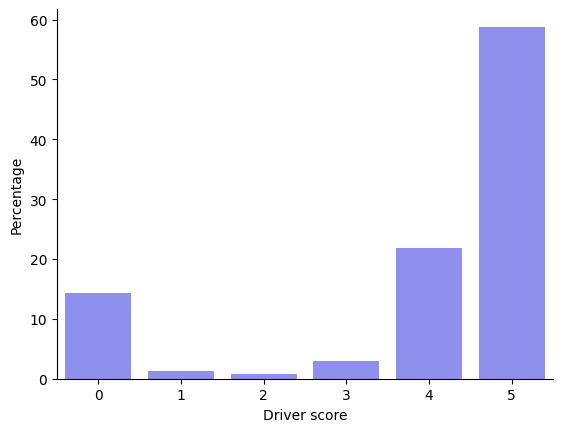

In [128]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_count, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() 

На графике видно, что более 50 % водителей ставили оценку 5, около 20% ставили 4, однако стоит заметить, что около 15% оценок - это 0.

- Проверим, как распределены оценки пассажиров rider_score.

In [132]:
rider_score_count = df \
.groupby('rider_score', as_index=False) \
.agg({'rider_score':'count'}) \
.rename(columns={'rider_score':'count_rider_score'}) \
.reset_index() \
.rename(columns={'index':'rider_score'}) \
.sort_values('rider_score')

rider_score_count

,rider_score,count_rider_score
0,0,352
1,1,32
2,2,30
3,3,213
4,4,1359
5,5,13404


In [135]:
rider_score_count['rider_score_procent'] = ((rider_score_count['count_rider_score']/(rider_score_count['count_rider_score']).sum())*100).round(2)

In [136]:
rider_score_count

,rider_score,count_rider_score,rider_score_procent
0,0,352,2.29
1,1,32,0.21
2,2,30,0.19
3,3,213,1.38
4,4,1359,8.83
5,5,13404,87.10


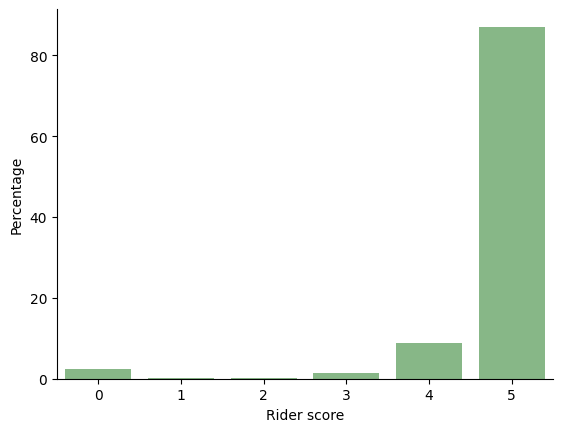

In [137]:
ax2 = sns.barplot(x='rider_score', y='rider_score_procent', data=rider_score_count, color='green', alpha=0.5)
ax2.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() 

Исходя из графика распределения оценок, которые поставили пассажиры, можно сделать вывод, что более 80 % всех оценок пользователей такси приходится на наивысший балл 5.